# Test

In [2]:
import scipy.io as sio
import numpy as np
import pandas as pd

In [3]:
timeRawTrace = sio.loadmat("data/timeRawTrace.mat")
print(timeRawTrace["timeRawTrace"].shape)
print(type(timeRawTrace["timeRawTrace"]))
print(timeRawTrace["timeRawTrace"][0][1:10])

(1, 2100)
<class 'numpy.ndarray'>
[ 3.33333333  6.66666667 10.         13.33333333 16.66666667 20.
 23.33333333 26.66666667 30.        ]


In [4]:
ChanName = sio.loadmat("data/ChanName.mat")
print(ChanName["ChanName"].shape)
print(ChanName["ChanName"][0:3])
temp = ChanName["ChanName"][0][0]


(24, 1)
[[(array(['EEG P3 - Pz'], dtype='<U11'), array([], dtype='<U1'), array([], shape=(0, 0), dtype=uint8), array([], shape=(0, 0), dtype=uint8), array([], shape=(0, 0), dtype=uint8), array([], shape=(0, 0), dtype=uint8), array([], shape=(0, 0), dtype=uint8), array([], shape=(0, 0), dtype=uint8), array([], shape=(0, 0), dtype=uint8), array([], shape=(0, 0), dtype=uint8), array([], dtype='<U1'), array([], shape=(0, 0), dtype=uint8))]
 [(array(['EEG C3 - Pz'], dtype='<U11'), array([], dtype='<U1'), array([], shape=(1, 0), dtype=float64), array([], shape=(1, 0), dtype=float64), array([], shape=(1, 0), dtype=float64), array([], shape=(1, 0), dtype=float64), array([], shape=(1, 0), dtype=float64), array([], shape=(1, 0), dtype=float64), array([], shape=(1, 0), dtype=float64), array([], shape=(1, 0), dtype=float64), array([], dtype='<U1'), array([], shape=(1, 0), dtype=float64))]
 [(array(['EEG F3 - Pz'], dtype='<U11'), array([], dtype='<U1'), array([], shape=(1, 0), dtype=float64), array

In [5]:
ChanName_df = pd.DataFrame(ChanName["ChanName"].flatten())
for name, column in ChanName_df.iteritems():
    if name == 'labels':
        for index, value in column.items():
            ChanName_df.at[index, 'labels'] = ChanName_df.at[index, 'labels'][0].astype(str)
    else:
        for index, value in column.items():
            ChanName_df.at[index, name] = np.array([])
ChanName_df

,labels,ref,theta,radius,X,Y,Z,sph_theta,sph_phi,sph_radius,type,urchan
0,EEG P3 - Pz,[],[],[],[],[],[],[],[],[],[],[]
1,EEG C3 - Pz,[],[],[],[],[],[],[],[],[],[],[]
2,EEG F3 - Pz,[],[],[],[],[],[],[],[],[],[],[]
3,EEG Fz - Pz,[],[],[],[],[],[],[],[],[],[],[]
4,EEG F4 - Pz,[],[],[],[],[],[],[],[],[],[],[]
5,EEG C4 - Pz,[],[],[],[],[],[],[],[],[],[],[]
6,EEG P4 - Pz,[],[],[],[],[],[],[],[],[],[],[]
7,EEG Cz - Pz,[],[],[],[],[],[],[],[],[],[],[]
8,EEG CM - Pz,[],[],[],[],[],[],[],[],[],[],[]
9,EEG A1 - Pz,[],[],[],[],[],[],[],[],[],[],[]


# Person

### RawTrace

In [6]:
import scipy.io as sio
import numpy as np

1. Mat文件：rawTracePersonX


- 变量 dataTrial 2100x40x19 时间 * Trial * 通道，包含了各通道各Trail的Rawtrace
   - 时间：包含2100个数据点，对应2100个RawTrace的时间。具体时间在timeRawTrace.mat（1x2100）文件中。采样频率300Hz 2100个点共对应7s。每个人的timeRawTrace都是一样的。
   - Trial：一共40个Trial，有些人是10个Trial。
   - 通道：一共24个通道，此处只包含19个通道[1:8 10:16 19:20 23:24]，不包含9CM 17X3 18X2 21X1 22A2。cm（废弃通道），X1 X2 X3 A2为空通道（什么都没接）。通道的名称在ChanName.mat文件中

- 变量 Track 1x40 
	40个trial对应的图片编号。<=10的编号为记忆过的图片，>10的是没有记忆过的。

In [7]:
rawTracePerson1 = sio.loadmat("data/Person1/rawTracePerson1.mat", variable_names = ["Track", "dataTrial"])
track, data_trial =  rawTracePerson1["Track"], rawTracePerson1["dataTrial"]

In [10]:
rawTracePerson1

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Wed Jun 17 10:45:43 2020',
 '__version__': '1.0',
 '__globals__': [],
 'Track': array([[18, 16, 16, 17,  8, 12, 19, 18, 10, 15, 20, 18,  9, 15, 18, 19,
         13, 12,  6,  2,  7, 16, 12, 12, 13, 11, 10,  5,  9,  2,  5,  5,
          2, 10,  2,  4,  1,  3,  8,  5]], dtype=uint8),
 'dataTrial': array([[[-116.40820312,   25.13215256,   19.68525314, ...,
            31.63987732,  -59.9471283 , -105.41244507],
         [-138.60797119,  -35.76722717,  -59.2139473 , ...,
           -74.85903931,  -63.24710083, -141.41207886],
         [ -55.50882339,   76.13163757,   69.18475342, ...,
            44.53974915,   77.75146484,  -33.71317291],
         ...,
         [  20.39040756,   -9.66749573,   96.48446655, ...,
            14.84004974,   25.25200272,  251.58392334],
         [  10.49050903,   -3.36755371,   95.58448029, ...,
             8.24011993,  -28.14745331,  189.48455811],
         [  43.49017334,   43.73196411,  1

In [8]:
print(track, "\n", track.shape, "\n")
print(data_trial, "\n", data_trial.shape, "\n")

[[18 16 16 17  8 12 19 18 10 15 20 18  9 15 18 19 13 12  6  2  7 16 12 12
  13 11 10  5  9  2  5  5  2 10  2  4  1  3  8  5]] 
 (1, 40) 

[[[-116.40820312   25.13215256   19.68525314 ...   31.63987732
    -59.9471283  -105.41244507]
  [-138.60797119  -35.76722717  -59.2139473  ...  -74.85903931
    -63.24710083 -141.41207886]
  [ -55.50882339   76.13163757   69.18475342 ...   44.53974915
     77.75146484  -33.71317291]
  ...
  [  20.39040756   -9.66749573   96.48446655 ...   14.84004974
     25.25200272  251.58392334]
  [  10.49050903   -3.36755371   95.58448029 ...    8.24011993
    -28.14745331  189.48455811]
  [  43.49017334   43.73196411  143.58399963 ...   50.53968811
     34.25191116  169.98477173]]

 [[ -93.60842896   46.13193893   42.48501968 ...   49.33969879
    -17.94755936  -81.41268921]
  [ -45.30892563   57.5318222    12.7853241  ...  -20.85958862
     28.85196495  -63.11287308]
  [-137.10798645  -13.56745148   -4.61449814 ...  -14.259655
    -20.64753151 -116.21233368]
 

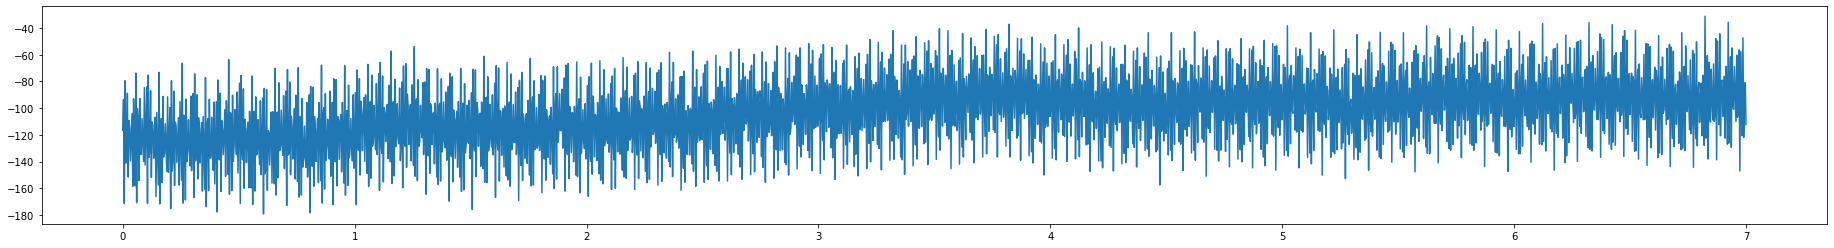

In [13]:
from matplotlib import pyplot as plt

plt.figure(figsize=(32, 4)) 
x_axis = np.linspace(0,7, 2100)
plt.plot(x_axis, data_trial[:,0,0])
plt.show()

### OS

2. Mat文件：OSPersonX
- 变量：OS：要分析的数据，36x52x40x54 时间 * 频率 * Trial * pair
	- time：对应的时间点在Time变量中
	- 频率：对应的频率在fOS变量中
	- Trial：同样为40个Trail或10个Trial，顺序和Track对应。
	- Pair：这里Pair指的是54个感兴趣的两个通道之间的配对。对应的Pair编号在Pair54.mat文件中。

In [20]:
OSPerson1 = sio.loadmat("data/Person1/OSPerson1.mat")
OSPerson1 = OSPerson1["Time"]
OSPerson1[0,30:]

array([6. , 6.2, 6.4, 6.6, 6.8, 7. ])

In [11]:
print(OSPerson1[0:2])
print(OSPerson1.shape)

[[[[0.90940073 0.75869128 0.94157858 ... 0.34762483 0.17441003
    0.64040124]
   [0.79008872 0.75487791 0.96302191 ... 0.46660208 0.66837191
    0.83478449]
   [0.50568406 0.89355239 0.78556754 ... 0.47988072 0.59921477
    0.53065636]
   ...
   [0.88587511 0.57217002 0.58449663 ... 0.21368684 0.63666883
    0.76354588]
   [0.89902793 0.96686632 0.97278956 ... 0.86338737 0.8487693
    0.82176897]
   [0.51777494 0.96212408 0.958589   ... 0.73213859 0.29492837
    0.44556556]]

  [[0.9616119  0.87872748 0.96279677 ... 0.24858331 0.39216447
    0.36034534]
   [0.56802595 0.7863644  0.85584298 ... 0.64401347 0.76701659
    0.92852001]
   [0.82355989 0.98307167 0.92745023 ... 0.47549296 0.36803961
    0.48737636]
   ...
   [0.71707396 0.53716075 0.53490645 ... 0.45397329 0.61968959
    0.78615277]
   [0.74390753 0.92664535 0.90917934 ... 0.76860291 0.75111981
    0.82080439]
   [0.43342643 0.95792172 0.88894737 ... 0.55524738 0.24557824
    0.39290024]]

  [[0.82888749 0.90281598 0.9497824

In [13]:
OSPerson1[0,0,0,:]

array([0.90940073, 0.75869128, 0.94157858, 0.99258314, 0.93215389,
       0.83931516, 0.39976194, 0.64998679, 0.51604454, 0.96257975,
       0.26437662, 0.70264151, 0.27164093, 0.73205347, 0.87800769,
       0.90246442, 0.26216245, 0.43648746, 0.29298773, 0.1557054 ,
       0.31137658, 0.55458888, 0.51088103, 0.60316386, 0.64040124,
       0.45646354, 0.36443869, 0.42925126, 0.43648746, 0.30528056,
       0.54430284, 0.50695231, 0.18064171, 0.26605349, 0.67072563,
       0.25852099, 0.15646146, 0.36154429, 0.40882655, 0.37291784,
       0.51177077, 0.30875515, 0.58898105, 0.16517852, 0.45426344,
       0.39976194, 0.04671893, 0.31338305, 0.30242165, 0.23528387,
       0.49064477, 0.34762483, 0.17441003, 0.64040124])

In [15]:
OSPerson1["OS"][0,0,0,:]

array([0.90940073, 0.75869128, 0.94157858, 0.99258314, 0.93215389,
       0.83931516, 0.39976194, 0.64998679, 0.51604454, 0.96257975,
       0.26437662, 0.70264151, 0.27164093, 0.73205347, 0.87800769,
       0.90246442, 0.26216245, 0.43648746, 0.29298773, 0.1557054 ,
       0.31137658, 0.55458888, 0.51088103, 0.60316386, 0.64040124,
       0.45646354, 0.36443869, 0.42925126, 0.43648746, 0.30528056,
       0.54430284, 0.50695231, 0.18064171, 0.26605349, 0.67072563,
       0.25852099, 0.15646146, 0.36154429, 0.40882655, 0.37291784,
       0.51177077, 0.30875515, 0.58898105, 0.16517852, 0.45426344,
       0.39976194, 0.04671893, 0.31338305, 0.30242165, 0.23528387,
       0.49064477, 0.34762483, 0.17441003, 0.64040124])

In [7]:
Pair54 = sio.loadmat("data/Pair54.mat")
Pair54["Pair54"][23]

array([ 6, 24], dtype=uint8)

In [4]:
from sklearn import svm

X = [[0, 0], [1, 1]]
y = [0, 1]
clf = svm.SVC()
clf.fit(X, y)
clf.predict([[2., 2.]])


array([1])